In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Exploratory Precipitation Analysis

In [8]:
# Create a database session object
session = Session(engine)

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.strftime(Measurement.date)).order_by(Measurement.date.desc()).first()
# Print Statement for most recent date as a row object
print(most_recent_date)
# Convert date to format to determine the date 12 months ago
most_recent_date_string = str(most_recent_date)
most_recent_date_string = most_recent_date_string.strip("(),'")

### Find the date twelve months ago
twelve_months_ago = datetime.strftime(datetime.strptime(most_recent_date_string, '%Y-%m-%d') - dt.timedelta(days=365), '%Y-%m-%d')

('2017-08-23',)


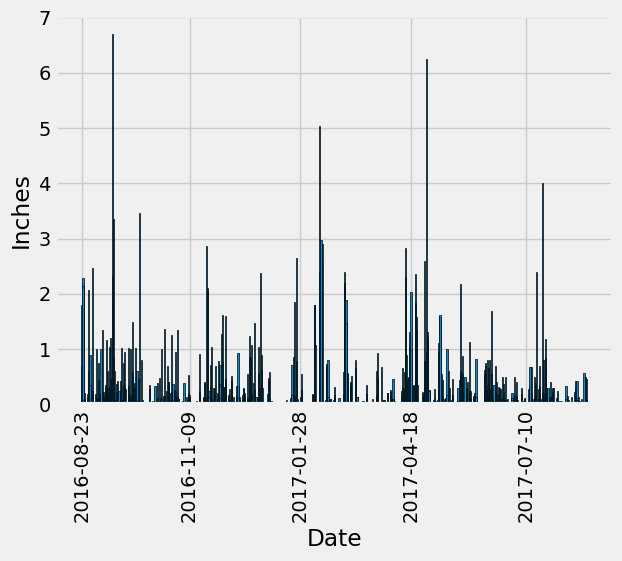

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
last_12_months_data = session.query(func.strftime(Measurement.date), Measurement.prcp).filter(Measurement.date >= twelve_months_ago).order_by(Measurement.date.desc()).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_12_months_data_df = pd.DataFrame(last_12_months_data, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
last_12_months_data_df_asc = last_12_months_data_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(last_12_months_data_df_asc['Date'],last_12_months_data_df_asc['Precipitation'], edgecolor='black')
# set xticks as dates that are 500 points apart.
x_ticks = last_12_months_data_df_asc['Date'][::500]
plt.xticks(x_ticks, rotation=90)
# set y label
plt.ylabel('Inches')
# set x label
plt.xlabel('Date')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_stats = last_12_months_data_df_asc['Precipitation'].describe()
pd.DataFrame(precipitation_stats)

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.id)).all()
total_stations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
MOST_ACTIVE_STATION = most_active_stations[0][0]
# makes a list of temp tuples
temp_list = session.query(Measurement.tobs).filter(Measurement.station == MOST_ACTIVE_STATION).all()
# get the min, max, then use a query to get the average because there is no average or count method to use on a list of tuples
temp_analysis = [min(temp_list),max(temp_list),session.query(func.avg(Measurement.tobs)).filter(Measurement.station == MOST_ACTIVE_STATION).scalar()]
temp_analysis

[(54.0,), (85.0,), 71.66378066378067]

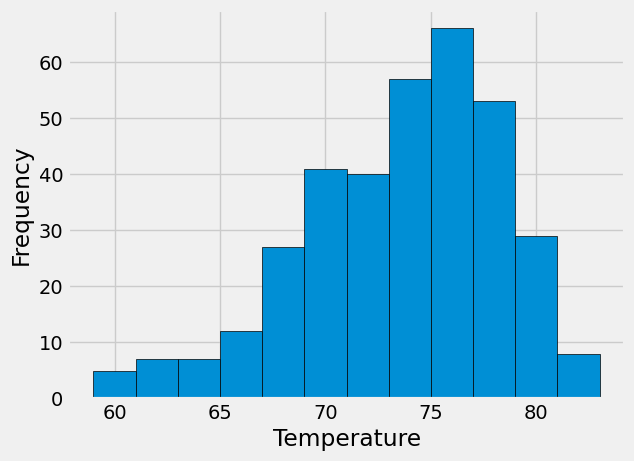

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_list_12_months = session.query(Measurement.tobs).filter(Measurement.station == MOST_ACTIVE_STATION, Measurement.date >= twelve_months_ago).all()
# simple loop to get the temps out of the list of tuples (temp_list_12_months)
temperatures = [temp[0] for temp in temp_list_12_months]
len(temperatures)
plt.hist(temperatures,bins =12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()